In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import networkx as nx
import scipy
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import seaborn as sns
%matplotlib widget

In [2]:
def motion(q_0, t_span, omegas, K, N, adj):
    s1 = odeint(func= kuramoto_1, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
    q = s1[:,::]
    dq = np.zeros(np.shape(q))
    for i in range(len(t_span)):
        dq[i] = kuramoto_1(q[i], t_span[i], omegas, K, N, adj)
    return q, dq


def rossler(_q, _t, _a, _b, _c, _r, _sigma, _N, _adj):
    _dq = np.zeros(np.shape(_q))
    x, y, z = _q[0::3], _q[1::3], _q[2::3]
    dx, dy, dz = _dq[0::3], _dq[1::3], _dq[2::3]
    
    # N nodi della rete
    for i in range(_N):
        dx[i] =  -y[i] - z[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (x - x[i]) )
        dy[i] =  x[i] + _a*y[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (y - y[i]) )
        dz[i] =  _b + z[i]*(x[i] - _c) + _sigma/(2*_r*_N) * np.sum( _adj[i] * (z - z[i]) )
            
    return _dq
    

def r_parameter(_q, _N):
    _r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / _N ))
    return _r

def r_mean_parameter(_q_0, _t_span, _omegas, _K , _N, _adj):
    _r_mean = 0
    _q, _dq = motion( _q_0, _t_span, _omegas, _K, _N, _adj)
    for t_count in range(len(_t_span)):
        _r_mean += r_parameter(_q[t_count,:], _N)
    #media
    _r_mean *= 1./len(t_span)
    return _r_mean


In [3]:
random.seed(0)

# parameters model 
N = 20

# initial conditions
q_0 = np.random.rand(3*N)*2*np.pi

# simulation 
dt = 0.0001
t_max = 50 
t_span = np.arange(0, t_max, dt)

a = 0.2
b = 0.2
c = 5.7
r = 0.1
sigma = 8

# network parameters
p = 0.1 
k = 3

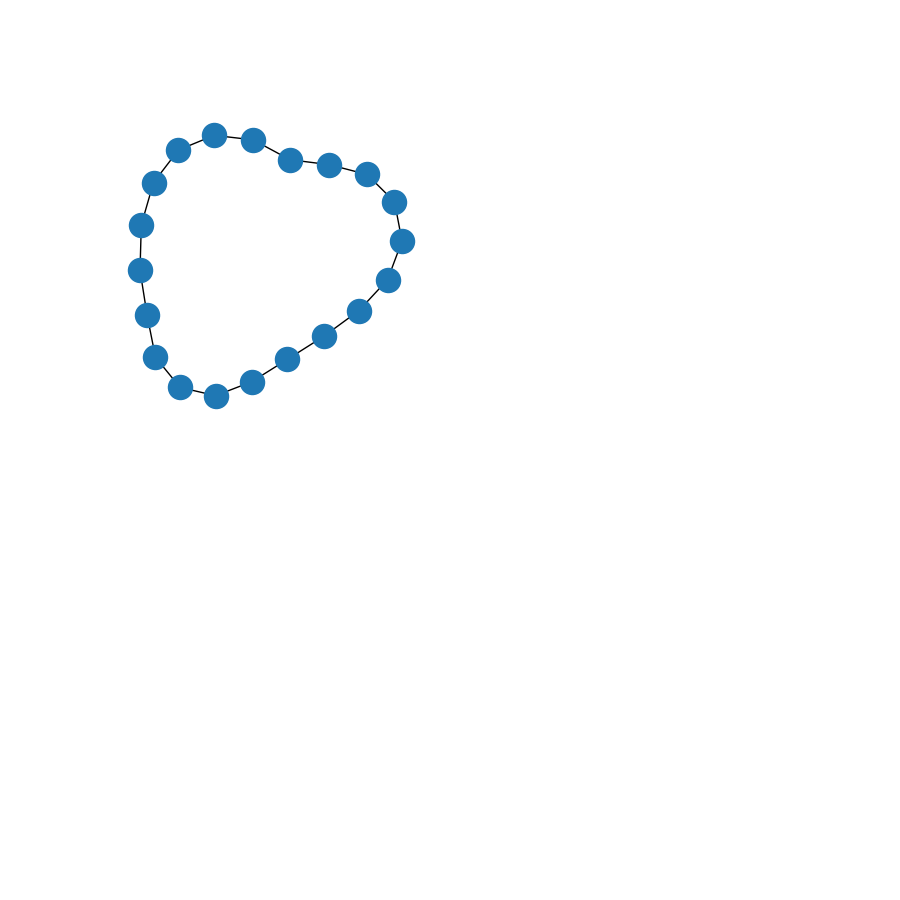

In [45]:
# Generate Erdos Renyi graphs based on probability
#graph = nx.erdos_renyi_graph(n=N, p=p)
name_graph = "Watts Strogatz : n = {} k = {} p = {}".format(N, k, p)
graph = nx.watts_strogatz_graph(n=N, k=k, p=p, seed=0)
#new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
fig_graph.add_subplot(2,2,1)
nx.draw(graph)
adj= nx.to_numpy_array(graph)



In [46]:
sol = odeint(func= rossler, y0 = q_0, t=t_span, args=(a, b, c, r, sigma, N, adj) )

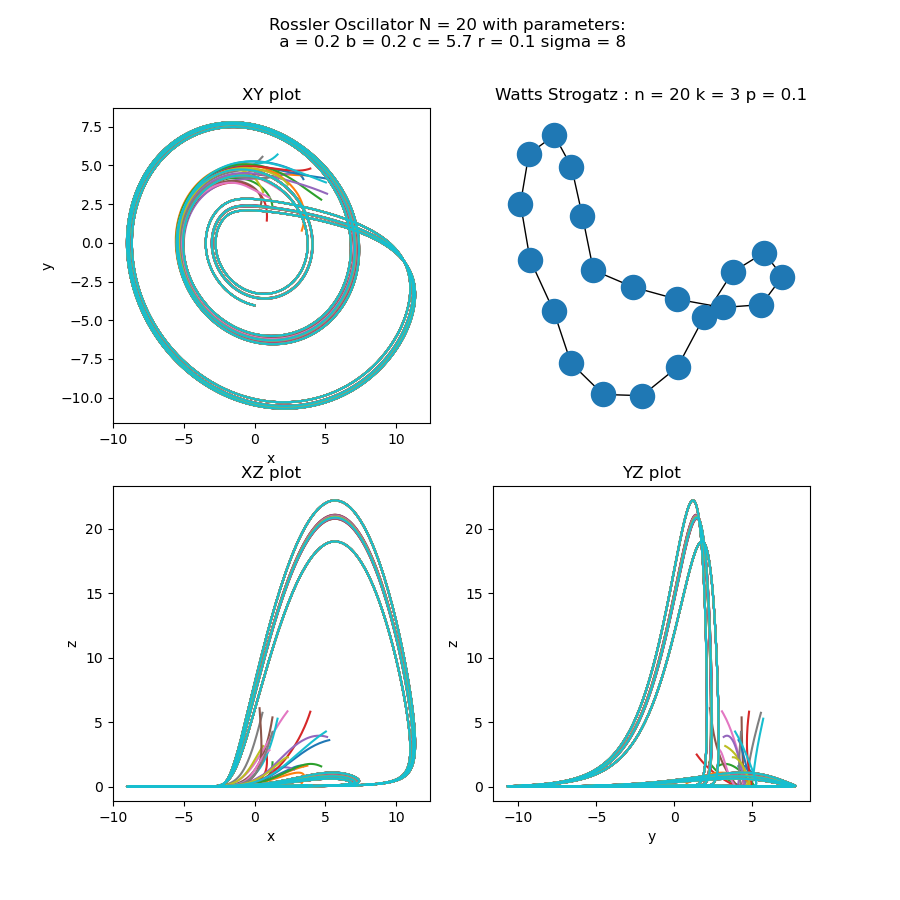

In [47]:
plt.close('all')
#new figure to plot network graphs
fig = plt.figure(figsize = (9, 9) )
fig.suptitle("Rossler Oscillator N = {5} with parameters: \n a = {0:.6g} b = {1:.6g} c = {2:.6g} r = {3:.6g} sigma = {4:.6g}".format(a, b, c, r, sigma, N))
axs_xy = fig.add_subplot(2,2,1)
axs_xy.set(xlabel="x", ylabel="y", title= "XY plot")
plt.plot(sol[:,0::3][::100], sol[:,1::3][::100])

axs_network = fig.add_subplot(2,2,2)
nx.draw(graph, ax = axs_network)
#axs_network.set(title="Erdos-Renyi: p = {}, N = {}".format(p, N))
axs_network.set(title=name_graph)

axs_xz = fig.add_subplot(2, 2, 3)
plt.plot(sol[:,0::3][::100], sol[:,2::3][::100])
axs_xz.set(xlabel="x", ylabel="z", title= "XZ plot")

axs_yz = fig.add_subplot(2, 2, 4)
plt.plot(sol[:,1::3][::100], sol[:,2::3][::100])
axs_yz.set(xlabel="y", ylabel="z", title= "YZ plot")

plt.show()

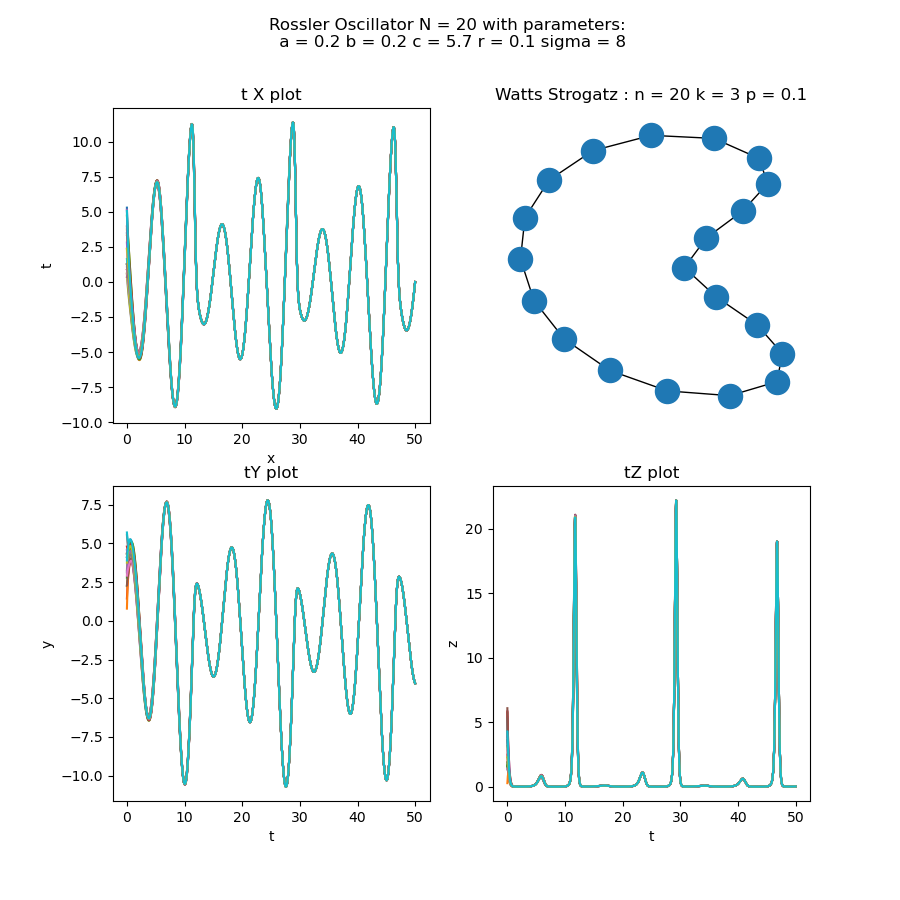

In [49]:
fig = plt.figure(figsize = (9, 9) )
fig.suptitle("Rossler Oscillator N = {5} with parameters: \n a = {0:.6g} b = {1:.6g} c = {2:.6g} r = {3:.6g} sigma = {4:.6g}".format(a, b, c, r, sigma, N))
axs_xt = fig.add_subplot(2,2,1)
axs_xt.set(xlabel="x", ylabel="t", title= "t X plot")
plt.plot(t_span[::100], sol[:,0::3][::100])

axs_network = fig.add_subplot(2,2,2)
nx.draw(graph, ax = axs_network)
axs_network.set(title=name_graph)

axs_yt = fig.add_subplot(2, 2, 3)
plt.plot(t_span[::100], sol[:,1::3][::100])
axs_yt.set(xlabel="t", ylabel="y", title= "tY plot")

axs_zt = fig.add_subplot(2, 2, 4)
plt.plot(t_span[::100], sol[:,2::3][::100])
axs_zt.set(xlabel="t", ylabel="z", title= "tZ plot")

plt.show()